<a href="https://colab.research.google.com/github/cucudas-cucudas/web1/blob/master/2%EC%A3%BC%EC%B0%A8_3_%EC%83%9D%EC%A1%B4_%EA%B4%80%EA%B3%84_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B6%84%EC%84%9D%EC%9D%98_%EC%82%AC%EB%B3%B8(%EC%8A%A4%EB%82%B5%ED%8F%AC%EC%A0%81%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lifelines

In [2]:
# 실행하고, 런타임 다시 시작 마지막으로 다시 모두 실행을 한다면 한글이 제대로 인식됩니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import matplotlib.font_manager as fm

sys_font=fm.findSystemFonts()
sys_font

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.tt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import pandas as pd

# 생존데이터셋 = pd.DataFrame( { 
#     "매체" : ["페이스북", "구글애즈", "페이스북", "구글애즈", "구글애즈"],
#     "기간(일)" : [90, 1770, 20, 200, 77],
#     "전환" : [2, 2, 5, 6, 1]
#     } )

In [6]:
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams["font.family"] = "NanumBarunGothic"
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10,7)

In [14]:
생존데이터셋 = pd.read_excel("/content/gdrive/MyDrive/생존관계 데이터.xlsx")

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

In [16]:
kmf = KaplanMeierFitter() 

생존데이터셋_열 = len( 생존데이터셋.columns )
생존데이터셋_열_명칭리스트 = 생존데이터셋.columns.tolist()
생존데이터셋_행 = len( 생존데이터셋 )

생존데이터셋_유니크리스트 = 생존데이터셋[생존데이터셋_열_명칭리스트[0]].unique()
생존데이터셋_키값리스트 = []
생존데이터셋_값리스트 = []

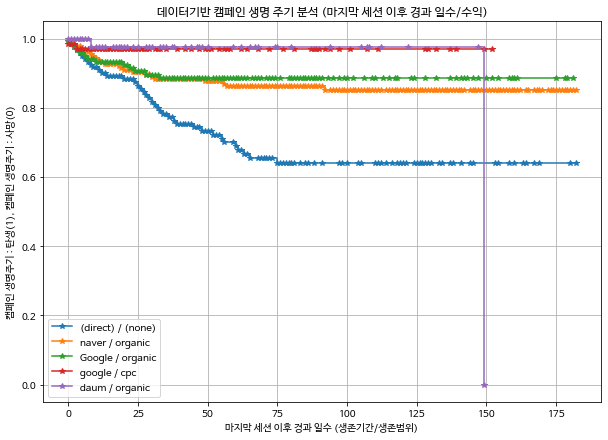

In [17]:
for x in range( 1, 생존데이터셋_열-1 ) :
    for i in range( 5 ) : # len(생존데이터셋_유니크리스트)
        for j in range( 생존데이터셋_행 ) :
            if 생존데이터셋_유니크리스트[i] == 생존데이터셋[생존데이터셋_열_명칭리스트[0]][j] :
                생존데이터셋_키값리스트.append( 생존데이터셋[생존데이터셋_열_명칭리스트[x]][j] )
                생존데이터셋_값리스트.append( 생존데이터셋[생존데이터셋_열_명칭리스트[-1]][j] )

        kmf.fit( 생존데이터셋_키값리스트, 생존데이터셋_값리스트 )
        kmf.plot( marker = "*", ci_show = False, label = 생존데이터셋_유니크리스트[i] )
        plt.title("데이터기반 캠페인 생명 주기 분석 (" + str(생존데이터셋.columns[1]) + "/" + str(생존데이터셋.columns[-1]) + ")")
        plt.xlabel(str(생존데이터셋.columns[x]) + " (생존기간/생존범위)")
        plt.ylabel("캠페인 생명주기 : 탄생(1), 캠페인 생명주기 : 사망(0)")

        생존데이터셋_키값리스트 = []
        생존데이터셋_값리스트 = []

    plt.grid()
    plt.show()